# ImageDataGenerator를 이용한 데이터 증강

- 이미지 변형, 로드
- batch_size 크기만큼씩 가져옴 (RAM에 부담 줄여줌)
- flow() : 이미 램에 들어와있음
- flow_from_directory() : 디렉토리 경로로 파일을 받아옴 (이미 트레인,테스트 나눠져있을때)
- next(): 샘플 뽑아올 때 (batch_size 크기만큼 이미지 확인용)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape

import time

In [2]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

# train_x = raw_train_x.reshape(-1, 28, 28, 1) / 255.
# test_x = raw_test_x.reshape(-1, 28, 28, 1) / 255.

# 여기서 스케일 안해줬으면 밑에서 해줄 수 있음
train_x = raw_train_x.reshape(-1, 28, 28, 1)
test_x = raw_test_x.reshape(-1, 28, 28, 1) 

train_y = raw_train_y
test_y = raw_test_y

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)                3

```
기존에 사용하던 방식
model.fit(train_x, test_x, ...)
```

(32, 28, 28, 1)
(32,)


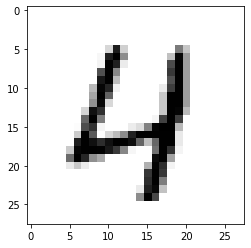

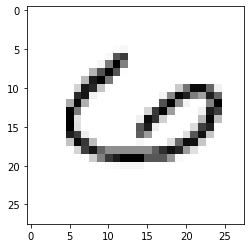

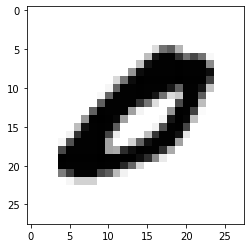

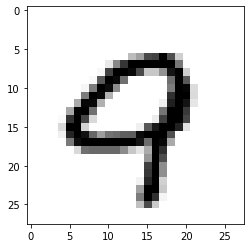

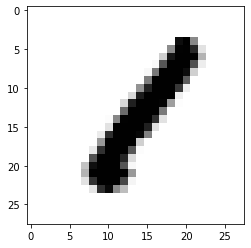

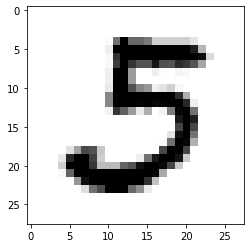

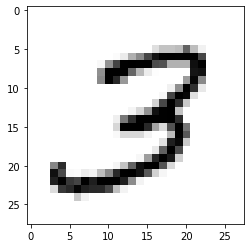

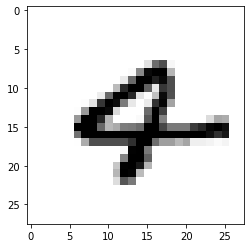

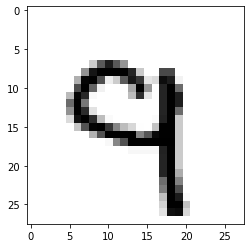

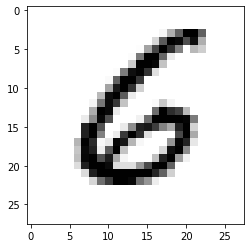

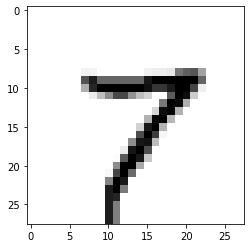

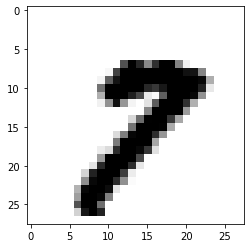

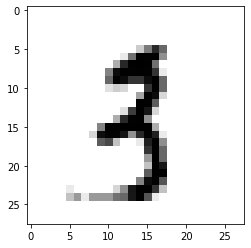

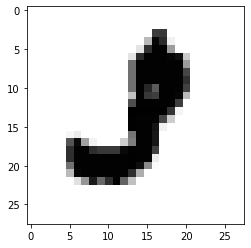

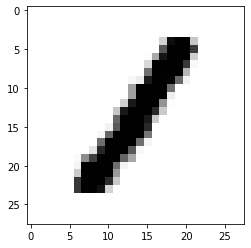

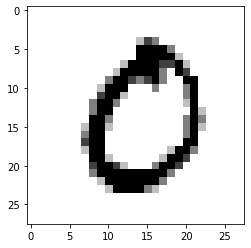

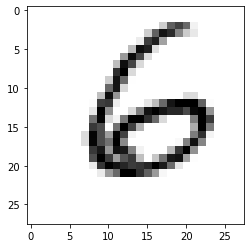

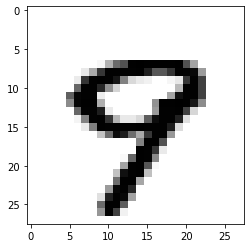

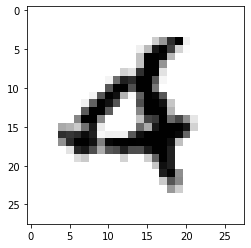

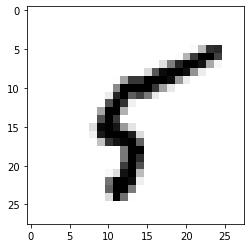

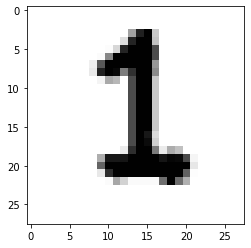

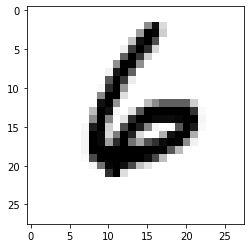

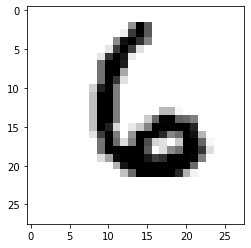

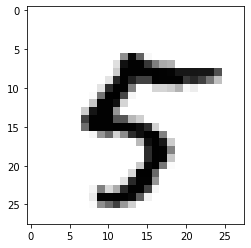

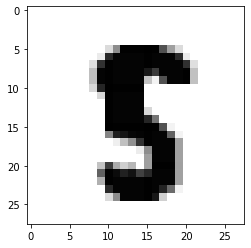

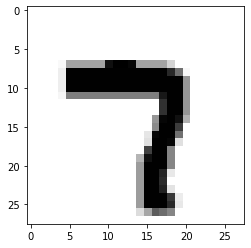

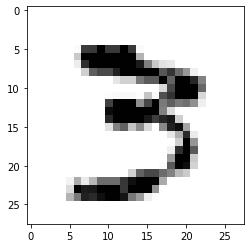

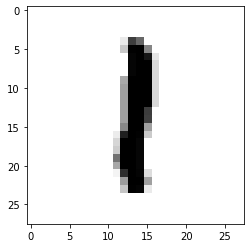

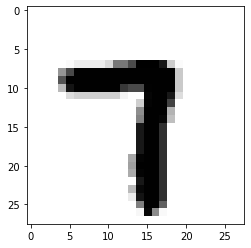

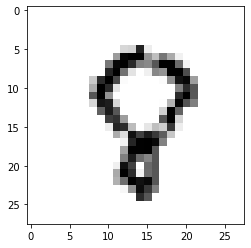

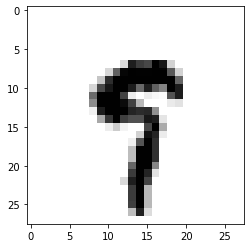

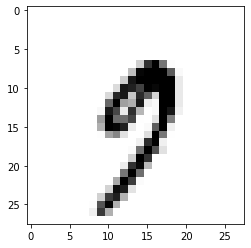

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    # rotation_range=180,
    # width_shift_range=0.5,
    # height_shift_range=0.5,
    # vertical_flip=True,     # 상하 반전
    # horizontal_flip = True, # 좌우 반전
    # shear_range = 0.5,          # 평행사변형처럼 기울기
    # brightness_range=(0.5, 0.8), # 밝기 조절
    # zoom_range=(0.9, 1.1),    # 이 사이로 확대
    rescale = 1/255.  # 위에서 스케일 안해줬을때 여기서 해줄수 있음!
).flow(train_x, train_y, batch_size=32)


# 사용하는 방법
batch_x, batch_y = next(train_data_generator)
print(batch_x.shape)
print(batch_y.shape)

for image in batch_x:
  plt.imshow(image.squeeze(), cmap='binary')
  plt.show()

# model.fit(train_data_generator, epochs = 10)

In [5]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_data_generator = ImageDataGenerator(
#     rotation_range=10,
# ).flow(train_x, train_y, batch_size=8, subset="training")

# valid_data_generator = ImageDataGenerator(
# ).flow(valid_x, valid_y, batch_size=8, subset="validation")

# test_data_generator = ImageDataGenerator(
#     rotation_range=10,
# ).flow(test_x, test_y, batch_size=8)

# model.fit(train_data_generator, epochs=10, validation_data= valid_data_generator)

# # y_ = model.predict(test_x)
# y_ = model.predict(test_data_generator)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    rotation_range=10,
    validation_split=0.2,
).flow(train_x, train_y, batch_size=8, subset="training")    # batch_size=8 : 8장씩 랜덤으로 무한대 추출

valid_data_generator = ImageDataGenerator(
    validation_split = 0.2,
).flow(train_x, train_y, batch_size=8, subset="validation")

test_data_generator = ImageDataGenerator(
    rotation_range=10,
).flow(test_x, test_y, batch_size=8)

model.fit(train_data_generator, epochs=10, validation_data= valid_data_generator)



# y_ = model.predict(test_x)
y_ = model.predict(test_data_generator)

Epoch 1/10
6000/6000 [==============================] - 47s 6ms/step - loss: 2.3075 - accuracy: 0.1120 - val_loss: 2.3009 - val_accuracy: 0.1126
Epoch 2/10
6000/6000 [==============================] - 38s 6ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3011 - val_accuracy: 0.1126
Epoch 3/10
6000/6000 [==============================] - 39s 6ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 4/10
6000/6000 [==============================] - 38s 6ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3007 - val_accuracy: 0.1126
Epoch 5/10
6000/6000 [==============================] - 38s 6ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3007 - val_accuracy: 0.1126
Epoch 6/10
6000/6000 [==============================] - 38s 6ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3010 - val_accuracy: 0.1126
Epoch 7/10
6000/6000 [==============================] - 37s 6ms/step - loss: 2.3016 - accuracy: 0.1123 - val_loss: 2.3009 - val_ac

# ImageDataGenerator를 사용해서 학습

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      validation_split=0.2,
).flow(train_x, train_y, batch_size=32, subset="training")

valid_data_generator = ImageDataGenerator(
      validation_split=0.2,
).flow(train_x, train_y, batch_size=32, subset="validation")

test_data_generator = ImageDataGenerator().flow(test_x, test_y, batch_size=32)

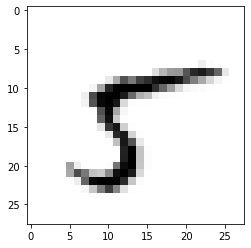

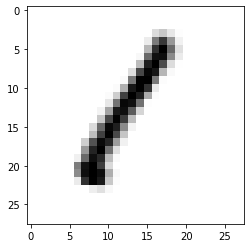

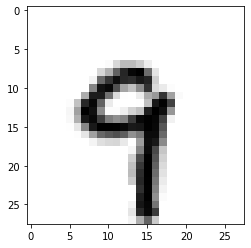

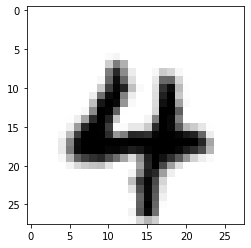

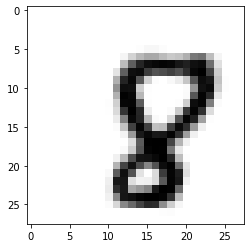

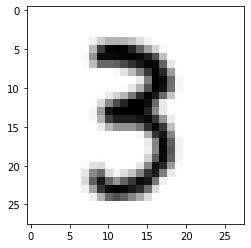

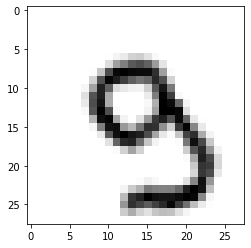

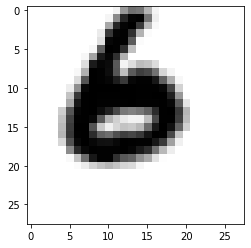

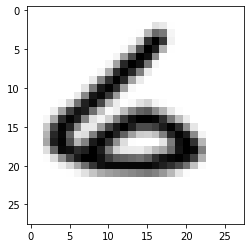

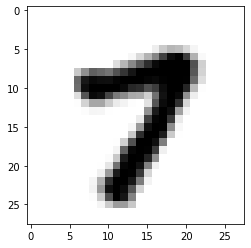

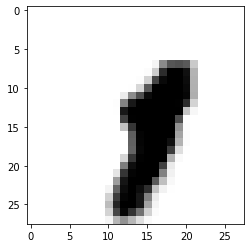

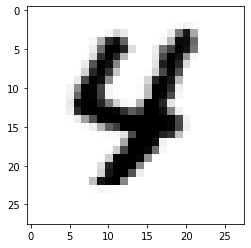

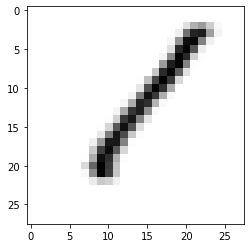

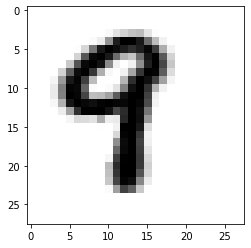

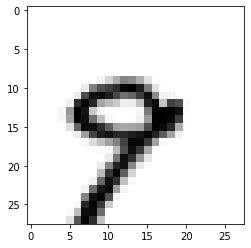

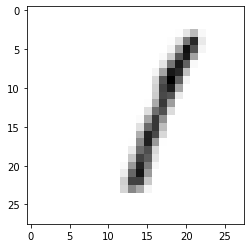

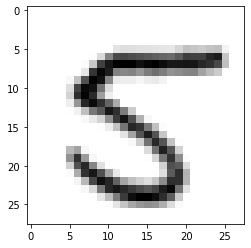

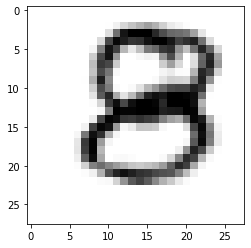

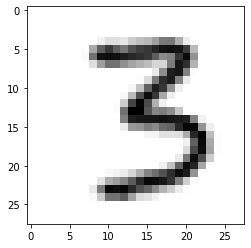

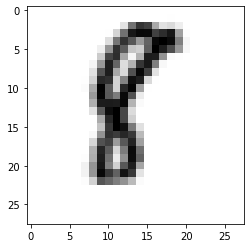

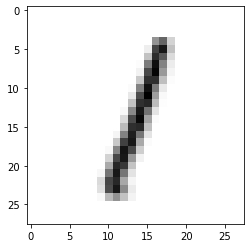

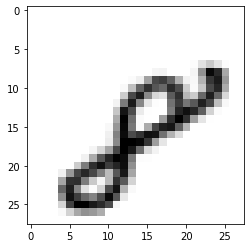

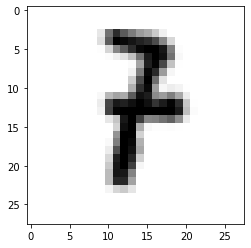

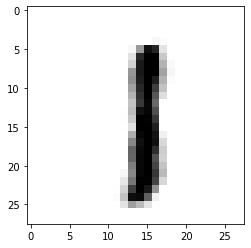

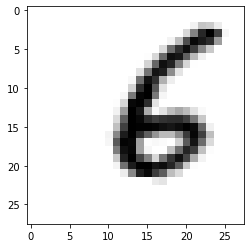

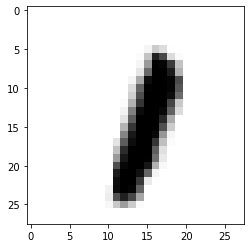

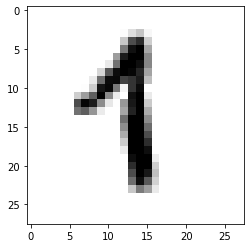

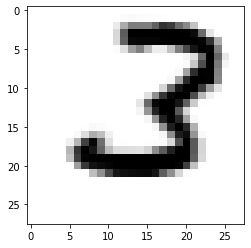

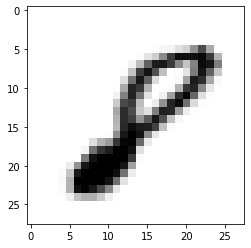

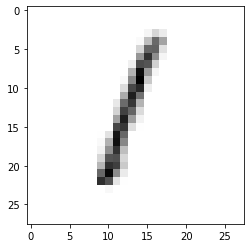

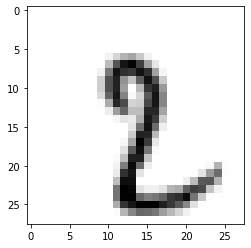

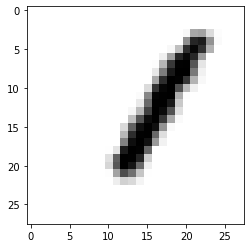

In [8]:
batch_x, batch_y = next(train_data_generator)
for a_x in batch_x:
  plt.imshow(a_x.squeeze(), cmap=plt.cm.binary)
  plt.show()

In [9]:
model.fit(train_data_generator, validation_data=valid_data_generator, epochs=1, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_data_generator)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_data_generator)
predicted = np.argmax(y_, axis=1)

print(predicted)


313/313 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1135
loss= 2.301053524017334
acc= 0.11349999904632568
[1 1 1 ... 1 1 1]


```
ImageDataGenerator(...).flow(train_x, train_y, batch_size=32)

train_data_generator = ImageDataGenerator(...)
  .flow_from_directory(
      "some/path/train",
      target_size=(224,224),
      batch_size=32.
      class_mode='sparse'
  )
  ```

# 증강한 데이터 다시 numpy로 받아서

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      validation_split=0.2,
).flow(train_x, train_y, batch_size=99999999, subset="training")

train_x, train_y = next(train_data_generator)


valid_data_generator = ImageDataGenerator(
      validation_split=0.2,
).flow(train_x, train_y, batch_size=999999999, subset="validation")

valid_x, valid_y = next(valid_data_generator)

In [11]:
model.fit(train_x, train_y, validation_data=(valid_x, valid_y), epochs=1, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_data_generator)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_data_generator)
predicted = np.argmax(y_, axis=1)

print(predicted)


313/313 [==============================] - 1s 3ms/step - loss: 2.3011 - accuracy: 0.1135
loss= 2.301055908203125
acc= 0.11349999904632568
[1 1 1 ... 1 1 1]
